<a href="https://colab.research.google.com/github/vivekml2/MachineLearning/blob/main/Expedia_Hotel_Recommendations_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [37]:
# Dataset contains 37 Million records, in ordre to have better performance we can select
# 100,000 logs and entries from each dataset.
train = pd.read_csv('/content/drive/MyDrive/train.csv', nrows=100000)
test = pd.read_csv('/content/drive/MyDrive/test.csv',nrows=100000)

In [38]:
train.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,9,2014-08-27,2014-08-31,2,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,9,2014-08-29,2014-09-02,2,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,9,2014-08-29,2014-09-02,2,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,3,2014-11-23,2014-11-28,2,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,3,2014-11-23,2014-11-28,2,0,1,14984,1,0,1,2,50,1457,21


In [39]:
test.head()

,id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,hotel_continent,hotel_country,hotel_market
0,0,2015-09-03 17:09:54,2,3,66,174,37449,5539.0567,1,1,0,3,2016-05-19,2016-05-23,2,0,1,12243,6,6,204,27
1,1,2015-09-24 17:38:35,2,3,66,174,37449,5873.2923,1,1,0,10,2016-05-12,2016-05-15,2,0,1,14474,7,6,204,1540
2,2,2015-06-07 15:53:02,2,3,66,142,17440,3975.9776,20,0,0,1,2015-07-26,2015-07-27,4,0,1,11353,1,2,50,699
3,3,2015-09-14 14:49:10,2,3,66,258,34156,1508.5975,28,0,1,10,2015-09-14,2015-09-16,2,0,1,8250,1,2,50,628
4,4,2015-07-17 09:32:04,2,3,66,467,36345,66.7913,50,0,0,0,2015-07-22,2015-07-23,2,0,1,11812,1,2,50,538


In [40]:
# Observation, testing data dosent have hotel_cluster. Testing set contains dates from 2015 
# and the training set contains dates from 2013 and 2014

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date_time                  100000 non-null  object 
 1   site_name                  100000 non-null  int64  
 2   posa_continent             100000 non-null  int64  
 3   user_location_country      100000 non-null  int64  
 4   user_location_region       100000 non-null  int64  
 5   user_location_city         100000 non-null  int64  
 6   orig_destination_distance  63078 non-null   float64
 7   user_id                    100000 non-null  int64  
 8   is_mobile                  100000 non-null  int64  
 9   is_package                 100000 non-null  int64  
 10  channel                    100000 non-null  int64  
 11  srch_ci                    99929 non-null   object 
 12  srch_co                    99929 non-null   object 
 13  srch_adults_cnt            100

In [42]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39999 entries, 0 to 39998
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         39999 non-null  int64  
 1   date_time                  39999 non-null  object 
 2   site_name                  39999 non-null  int64  
 3   posa_continent             39999 non-null  int64  
 4   user_location_country      39999 non-null  int64  
 5   user_location_region       39999 non-null  int64  
 6   user_location_city         39999 non-null  int64  
 7   orig_destination_distance  26628 non-null  float64
 8   user_id                    39999 non-null  int64  
 9   is_mobile                  39999 non-null  int64  
 10  is_package                 39999 non-null  int64  
 11  channel                    39999 non-null  int64  
 12  srch_ci                    39999 non-null  object 
 13  srch_co                    39999 non-null  obj

In [43]:
train = pd.read_csv('/content/drive/MyDrive/train.csv', parse_dates=['date_time'], sep=',', nrows=200000)

In [44]:
train.shape

(200000, 24)

In [45]:
train.head(4)

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,9,2014-08-27,2014-08-31,2,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,9,2014-08-29,2014-09-02,2,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,9,2014-08-29,2014-09-02,2,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,3,2014-11-23,2014-11-28,2,0,1,14984,1,0,1,2,50,1457,80


In [46]:
train.dtypes

date_time                    datetime64[ns]
site_name                             int64
posa_continent                        int64
user_location_country                 int64
user_location_region                  int64
user_location_city                    int64
orig_destination_distance           float64
user_id                               int64
is_mobile                             int64
is_package                            int64
channel                               int64
srch_ci                              object
srch_co                              object
srch_adults_cnt                       int64
srch_children_cnt                     int64
srch_rm_cnt                           int64
srch_destination_id                   int64
srch_destination_type_id              int64
is_booking                            int64
cnt                                   int64
hotel_continent                       int64
hotel_country                         int64
hotel_market                    

In [47]:
# What are we predicting?

# Goal is to predict the booking outcome (hotel cluster) for a user event, based on their search
# and other attributes associated with that user event. According to the description given by Expedia,
# there are 100 clusters in total

In [48]:
# Identify any missing Values

train.isnull().sum()

date_time                        0
site_name                        0
posa_continent                   0
user_location_country            0
user_location_region             0
user_location_city               0
orig_destination_distance    69637
user_id                          0
is_mobile                        0
is_package                       0
channel                          0
srch_ci                        177
srch_co                        177
srch_adults_cnt                  0
srch_children_cnt                0
srch_rm_cnt                      0
srch_destination_id              0
srch_destination_type_id         0
is_booking                       0
cnt                              0
hotel_continent                  0
hotel_country                    0
hotel_market                     0
hotel_cluster                    0
dtype: int64

In [49]:
total_missing=train.isnull().sum().sort_values(ascending=False)
percent=(total_missing/train['hotel_cluster'].count()).sort_values(ascending=False)
missing_data=pd.concat([total_missing,percent], axis=1, keys=['Total','Percent'])
missing_data

,Total,Percent
orig_destination_distance,69637,0.348185
srch_ci,177,0.000885
srch_co,177,0.000885
channel,0,0.000000
site_name,0,0.000000
posa_continent,0,0.000000
user_location_country,0,0.000000
user_location_region,0,0.000000
user_location_city,0,0.000000
user_id,0,0.000000


In [50]:
# finding missing percentage of data from test data set as well

total_missing=test.isnull().sum().sort_values(ascending=False)
percent=(total_missing/train['hotel_cluster'].count()).sort_values(ascending=False)
missing_data=pd.concat([total_missing,percent], axis=1, keys=['Total','Percent'])
missing_data

,Total,Percent
orig_destination_distance,13371,0.066855
hotel_market,0,0.000000
hotel_country,0,0.000000
date_time,0,0.000000
site_name,0,0.000000
posa_continent,0,0.000000
user_location_country,0,0.000000
user_location_region,0,0.000000
user_location_city,0,0.000000
user_id,0,0.000000


In [51]:
# Remove the missing values from ci/co, since its small percentage 
# impute values for orig_destination_distance

**Visualization**
1. Correlation between the columns

**A Heatmap to infer the correlation between different columns with each other and to check if there is anylinear correlation between any columns **

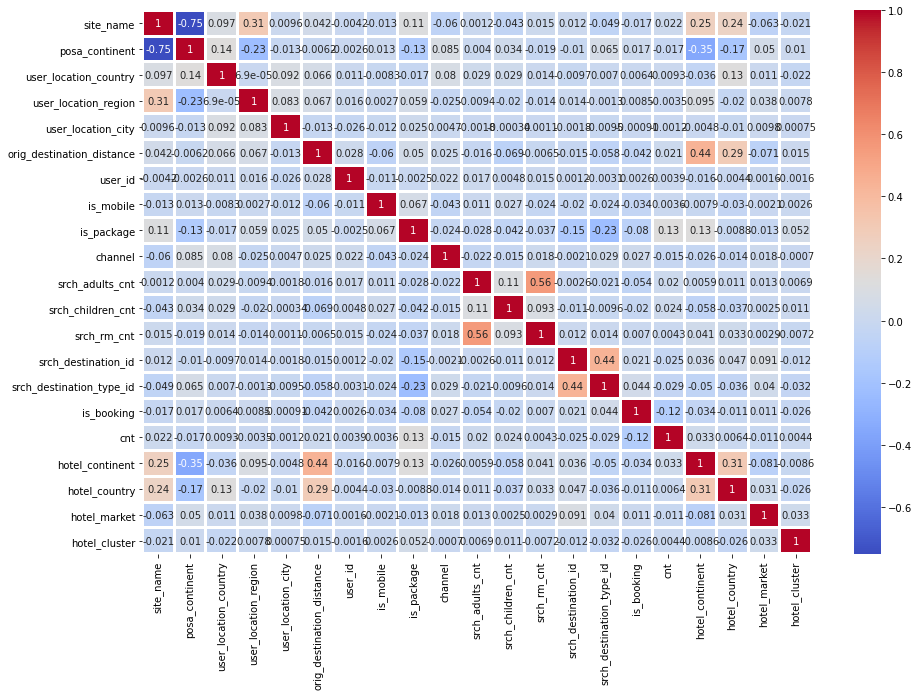

In [52]:
fig, ax= plt.subplots()
fig.set_size_inches(15,10)
sns.heatmap(train.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)

# Following shows that no column linearly with any other column in the dataset.
# From this heatmap non of the columns are correlated with eachother, 
# so we can go ahead and use all attributes in modeling
# Mappings are not linear

**2. Frequency of bookings through mobile**



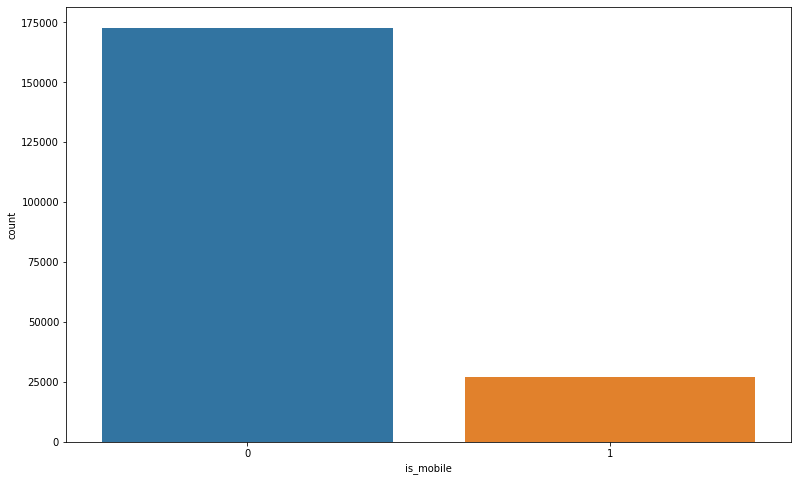

In [53]:
fig,ax= plt.subplots()

fig.set_size_inches(13,8)
sns.countplot(x='is_mobile',data=train,  order=[0,1],ax=ax)



Above graph shows customers booked their hotels from Expedia site rather than mobile. so we can suggest Expedia to make more interactive, easy to webstie so customers can easily  book their hotels.

3. Frequency of bookings with total package(i.e with travel)


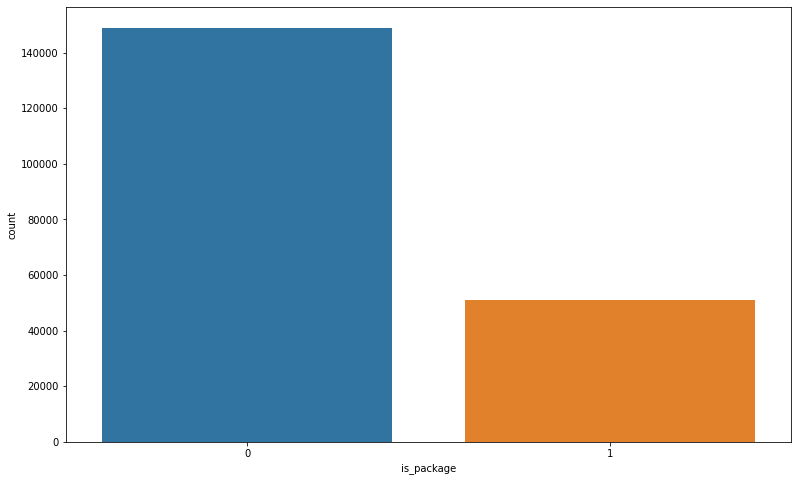

In [54]:
fig,ax= plt.subplots()
fig.set_size_inches(13,8)
sns.countplot(x='is_package', data=train, order=[0,1],ax=ax)



The number of customers booking their hotels with total package. ie. with travel are less. We can interpret this that there can be many reason of this like booking with travel is getting very expensive or less range of hotels where customers wants to travel to.

4. Frequency of Continent site used for booking

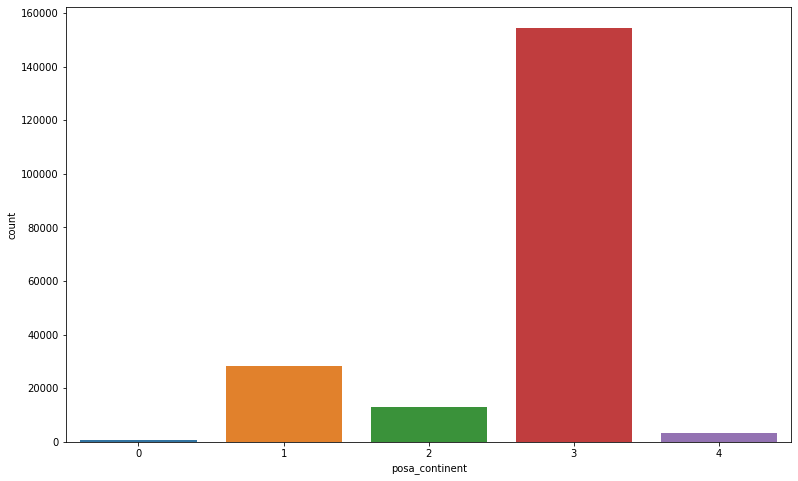

In [55]:
fig,ax= plt.subplots()
fig.set_size_inches(13,8)
sns.countplot(x='posa_continent',data=train,order=[0,1,2,3,4],ax=ax)


 Most of the people booking are from continent 3. May be poeple there have more expending power. so Expedia can increase its business by increasing more hotel options, more variety, better user experiences etc. For other continents Expedia can lower its prices on hotel or  give discounts, loyalty points

5. Which continent has the most number of hotels?

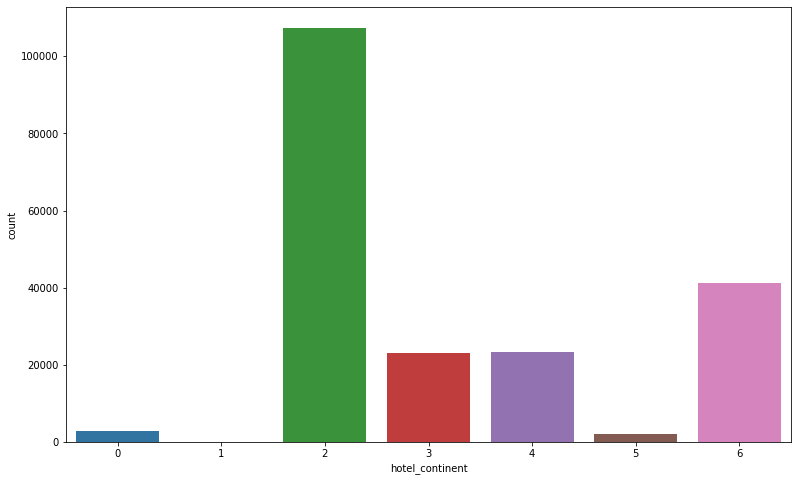

In [56]:
fig,ax= plt.subplots()
fig.set_size_inches(13,8)
sns.countplot(x='hotel_continent',data=train,order=[0,1,2,3,4,5,6],ax=ax)

6. Putting the two above together

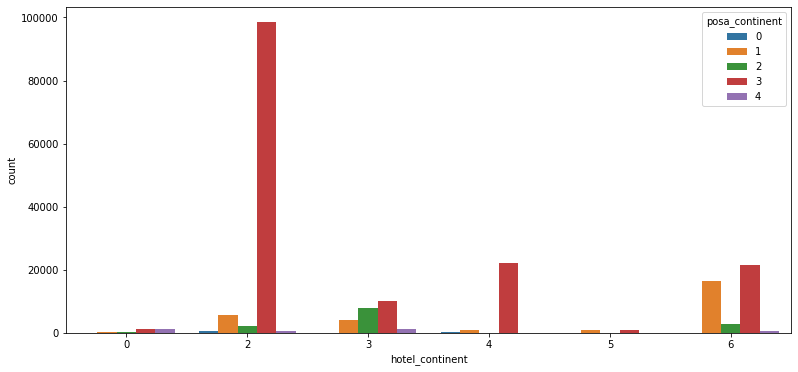

In [57]:
fig,ax= plt.subplots()
fig.set_size_inches(13,6)
sns.countplot(x='hotel_continent',hue='posa_continent', data=train)

Let's look at data specifically where customers have made a booking

In [58]:
bookings = train[train['is_booking']==1]

7. What ar ethe most countries the customer travel from?

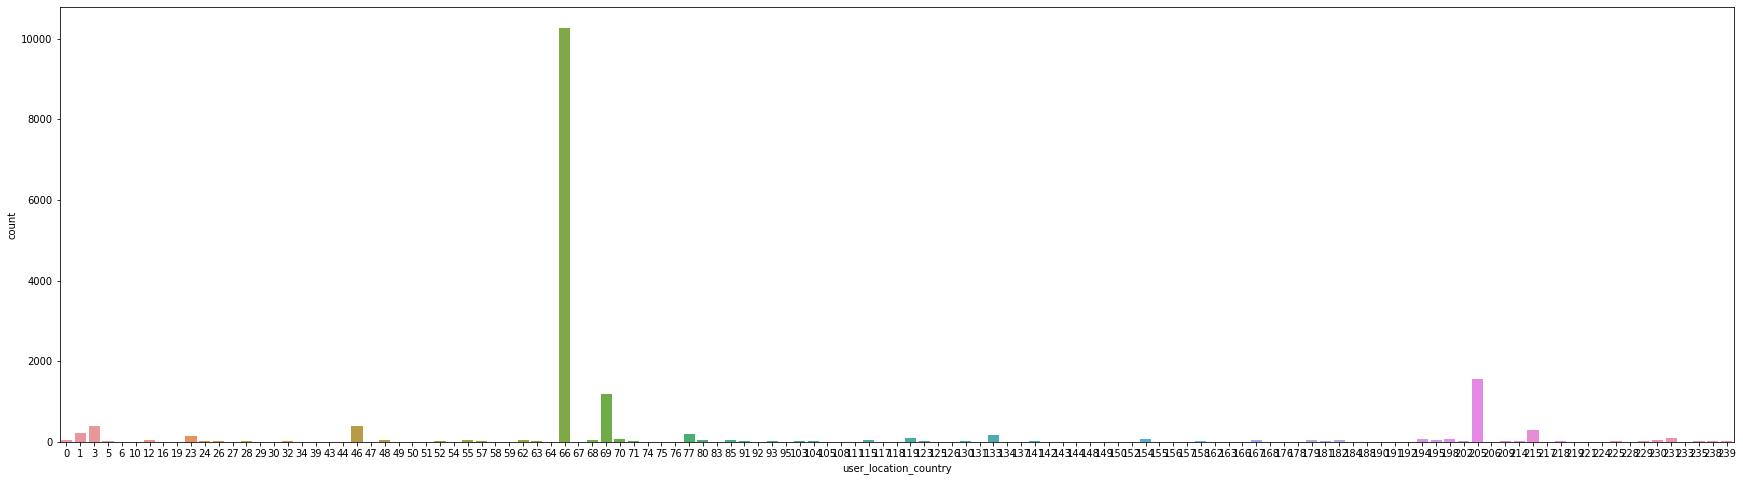

In [59]:
fig, ax= plt.subplots()
fig.set_size_inches(30,8)
sns.countplot(x='user_location_country',data=bookings.sort_values(by=['user_location_country']))

If customers are travelling from the 66th country the most, we can give an insight to expedia to give discounts to regular and most frequent customers to boost the business and to see why other countries have so low bookings of htoels, is it beacuse of the price, less number of hotels, less facilities in a hotel.

8. What are the most countries the customer travel to?


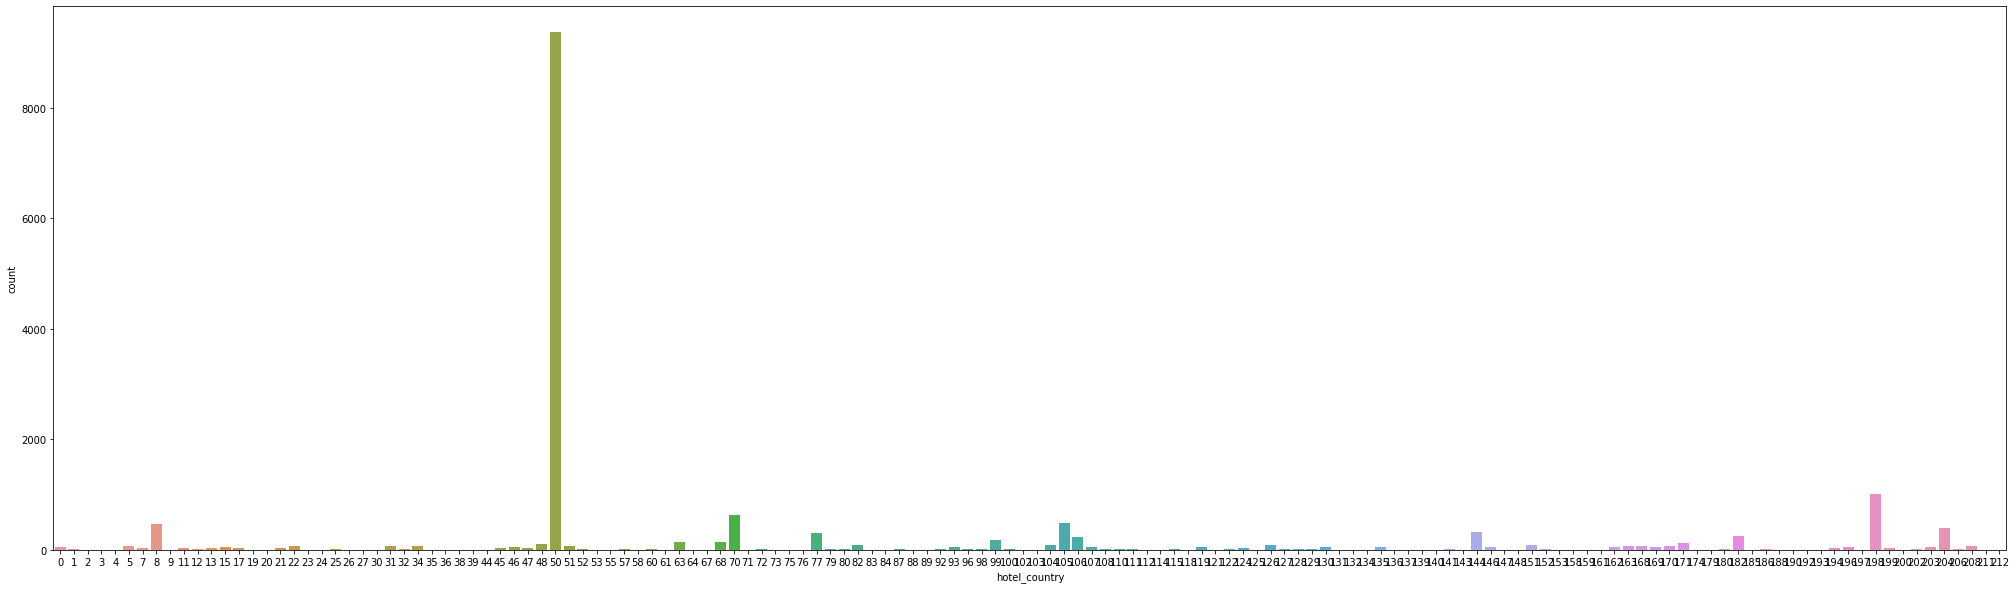

In [60]:
fig, ax= plt.subplots()
fig.set_size_inches(35,10)
sns.countplot(x='hotel_country',data=bookings.sort_values(by=['hotel_country']))

If customers are travelling from 66th country the most, we can give an insight to Expedia to give discuonts to regular and most frequent customers to boose the business and to see why other ocuntries have so low booking of hotels, is it because the price, number of hotels, less facilities in a hotel.

8. What are the most countries the customer travel to?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


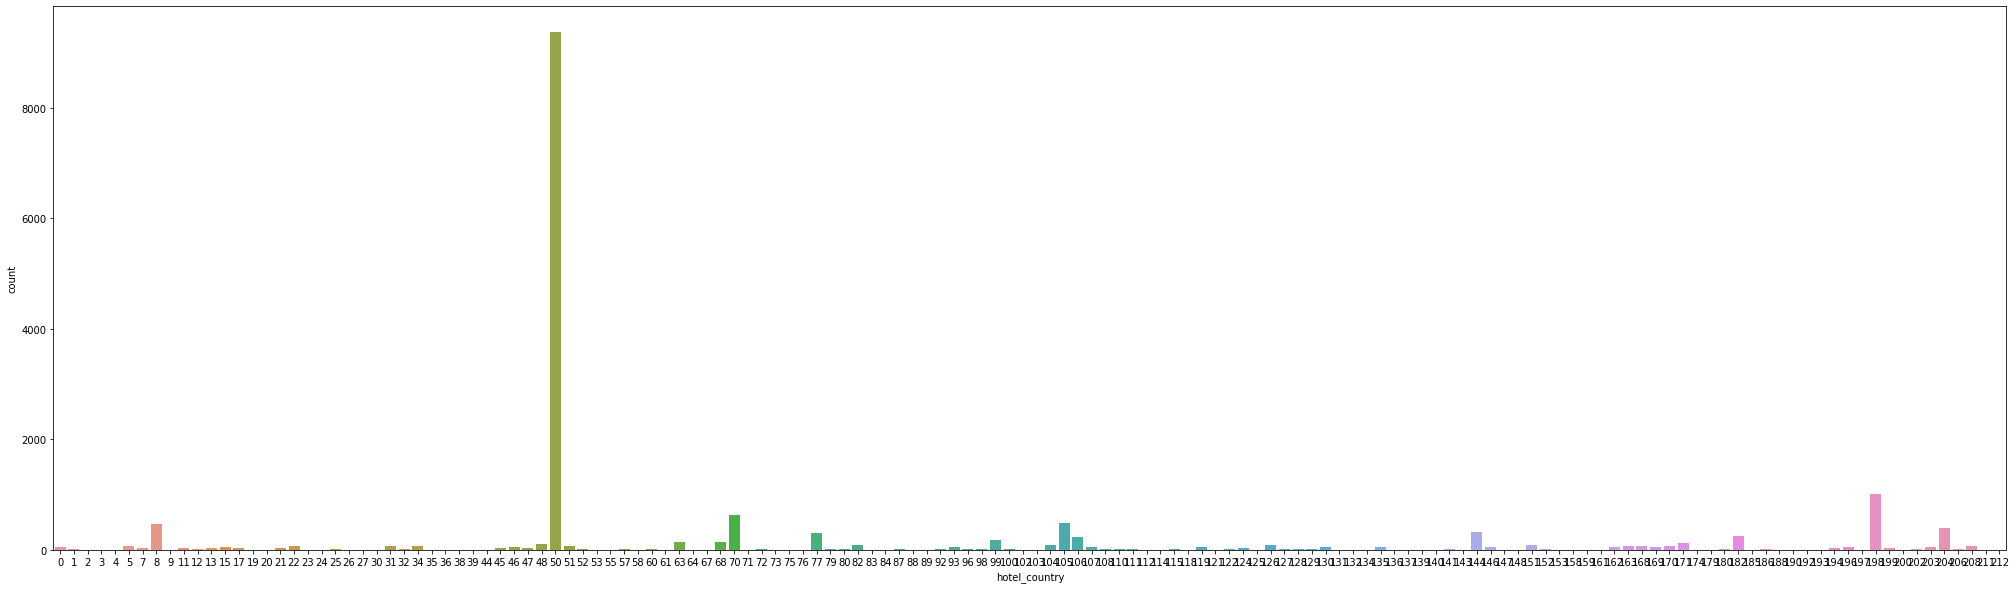

In [64]:
fig, ax = plt.subplots()
fig.set_size_inches(35,10)
sns.countplot('hotel_country', data=bookings.sort_values(by=['hotel_country']))

If cutsomers are travelling to the 50th country the most, we can give an insight to Expedia to give more recommondations of different hotel with different range ofprices, with different facilities, with different locations, i.e. hotels in every region, every cirty of the 50th country


9. **How many People by continent are booking from mobile**

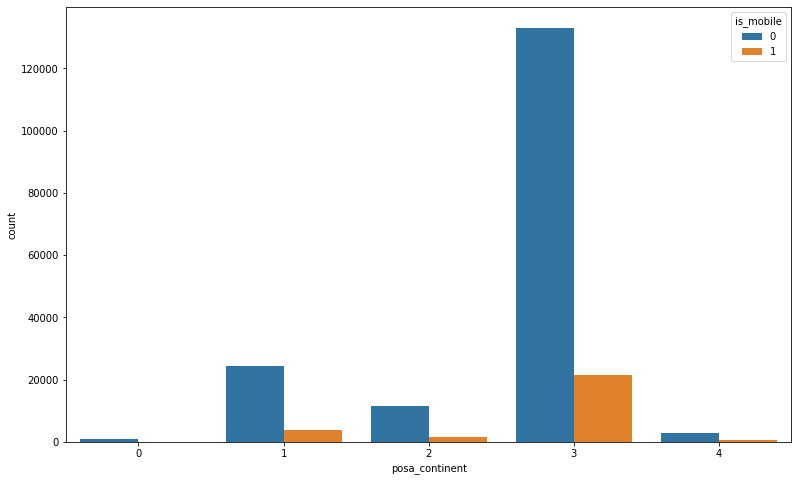

In [66]:
fig,ax = plt.subplots()
fig.set_size_inches(13,8)
sns.countplot(x='posa_continent',hue='is_mobile',data=train)

using this graph we can give an insight to Expedia that to improve desktop website interface and to make it more interactive, easy payment and website dosent crash when lot of customers tries to book their ticket rather than on mobile interface.

**10. How many people by country are booking form mobile?**

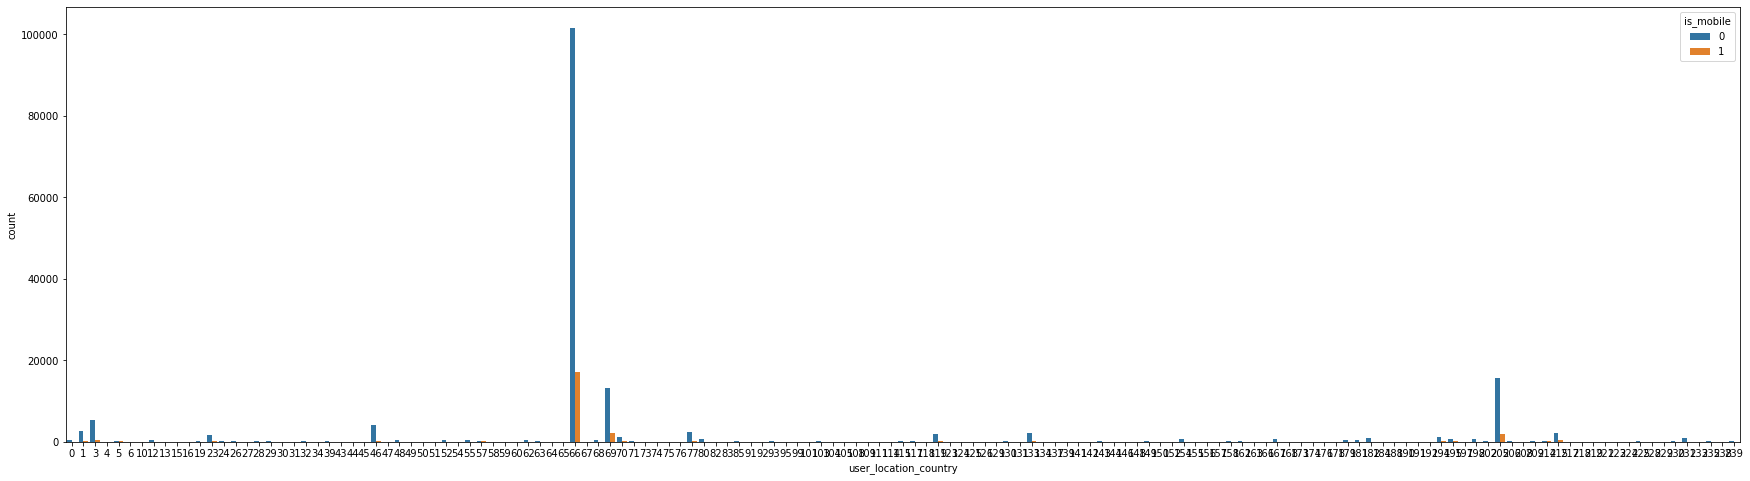

In [70]:
fig, ax= plt.subplots()
fig.set_size_inches(30,8)
sns.countplot(x='user_location_country',hue='is_mobile',data=train)

**11. Frequeny for each Hotel Clsuters**

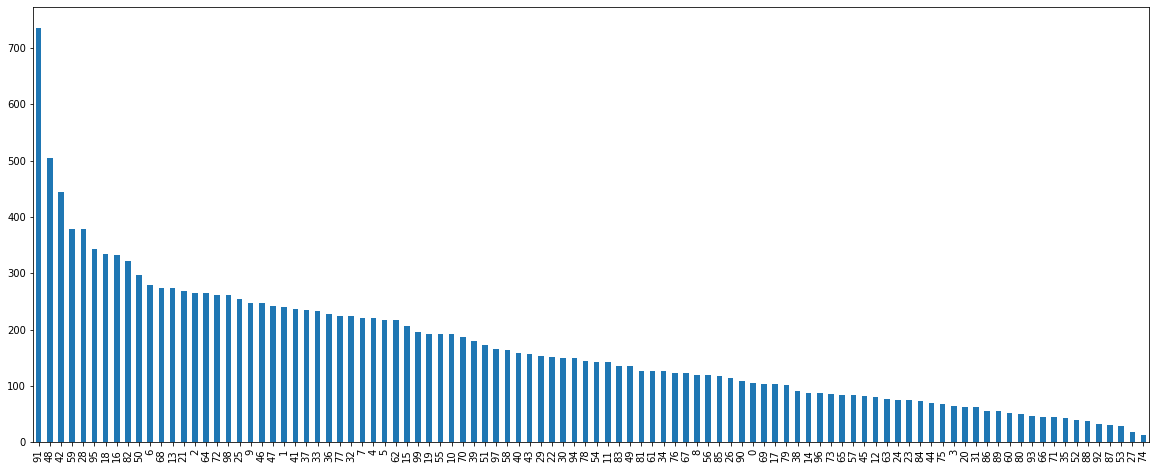

In [71]:
bookings['hotel_cluster'].value_counts().plot(kind='bar',figsize=(20,8))

Hotel Cluster 91 is the most booked hotel

**12. What's the most impactful channel**

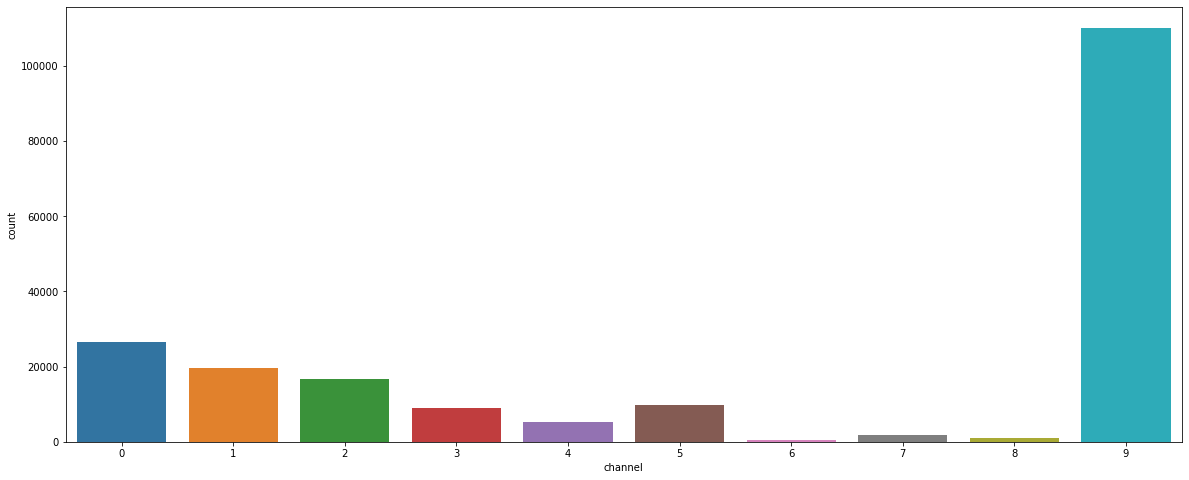

In [72]:
fig,ax= plt.subplots()
fig.set_size_inches(20,8)
sns.countplot(x='channel', order =list(range(0,10)), data=train)

Marketing Channel 9 is the most succesful

Feature Engineering:

We can find out the duration of stay of the customres by subtracting the date of check-in to check-out to help Expedia to categorize the hotels like "Long Trips" where customers book thier hotels for long period of time or "Short Trips" where customers book their hotels for short period of time. This could help to recommend other customers when those customers choose the same search parameters like "Long Trips" and "Short Trips". Moreover if we separate day, month and year it can also help us to find the business of Expedia over the years. i.e. customers booking in which year, month or day the most.

In [78]:
def convert_date_into_days(df):
  df['srch_ci'] = pd.to_datetime(df['srch_ci'], infer_datetime_format=True,errors='coerce')
  df['srch_co'] = pd.to_datetime(df['srch_co'], infer_datetime_format=True, errors='coerce')
  df['stay_duration'] = (df['srch_co'] - df['srch_ci']).astype('timedelta64[D]')
  df['no_of_prior_days_booking'] =  (df['srch_ci'] - df['date_time']).astype('timedelta64[D]')

  #For hotel check-in
  # Month, Year, Day

  df['Cin_day'] = df ["srch_ci"].apply(lambda x: x.day)
  df['Cin_month'] = df["srch_ci"].apply(lambda x: x.month)
  df['Cin_year'] = df['srch_ci'].apply(lambda x: x.year)

  return df

In [79]:
train = convert_date_into_days(train)

In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date_time                  200000 non-null  datetime64[ns]
 1   site_name                  200000 non-null  int64         
 2   posa_continent             200000 non-null  int64         
 3   user_location_country      200000 non-null  int64         
 4   user_location_region       200000 non-null  int64         
 5   user_location_city         200000 non-null  int64         
 6   orig_destination_distance  130363 non-null  float64       
 7   user_id                    200000 non-null  int64         
 8   is_mobile                  200000 non-null  int64         
 9   is_package                 200000 non-null  int64         
 10  channel                    200000 non-null  int64         
 11  srch_ci                    199823 non-null  datetime

In [81]:
train.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,stay_duration,no_of_prior_days_booking,Cin_day,Cin_month,Cin_year
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,9,2014-08-27,2014-08-31,2,0,1,8250,1,0,3,2,50,628,1,4.0,15.0,27.0,8.0,2014.0
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,9,2014-08-29,2014-09-02,2,0,1,8250,1,1,1,2,50,628,1,4.0,17.0,29.0,8.0,2014.0
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,9,2014-08-29,2014-09-02,2,0,1,8250,1,0,1,2,50,628,1,4.0,17.0,29.0,8.0,2014.0
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,3,2014-11-23,2014-11-28,2,0,1,14984,1,0,1,2,50,1457,80,5.0,105.0,23.0,11.0,2014.0
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,3,2014-11-23,2014-11-28,2,0,1,14984,1,0,1,2,50,1457,21,5.0,105.0,23.0,11.0,2014.0


**13. How Many bookings in each year?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


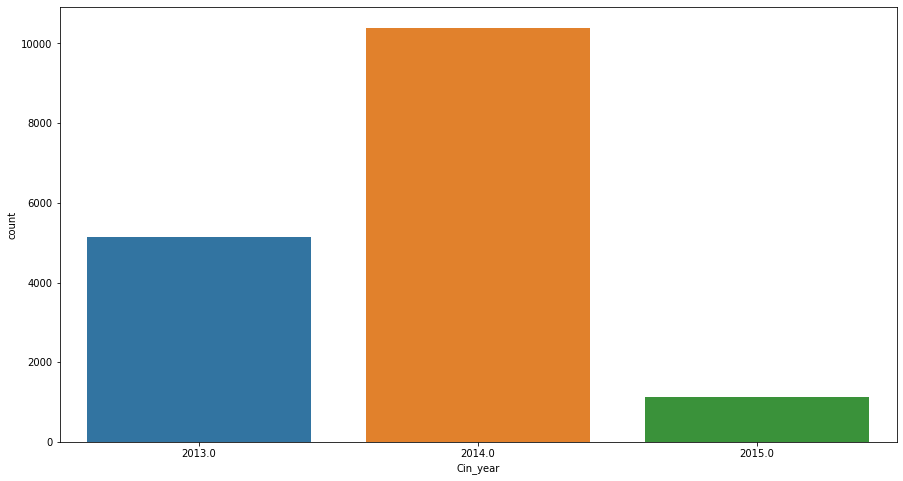

In [82]:
fig,ax = plt.subplots()
fig.set_size_inches(15,8)
sns.countplot('Cin_year', data=train[train['is_booking']==1])

Bookigs by customers in each year. This helps us to understand Expedia business ie.in 2013 was good, and 2014 business was at it peak's and 2015 Expedia's business was as it worst

How Many bookings in each month?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


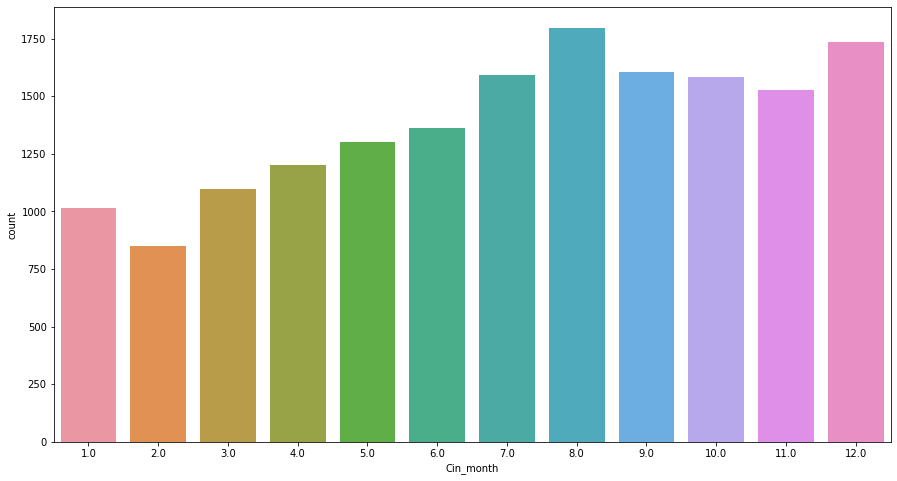

In [83]:
fig,ax = plt.subplots()
fig.set_size_inches(15,8)
sns.countplot('Cin_month', data=train[train['is_booking']==1])

Above Graph tells us about the customer behavior that is when the customers are most likely to book their hotels and want to travel with their family. According to the graph we can deduce that during 8th month which is August, customers book hotel the most.

15. How many bookings in each month?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


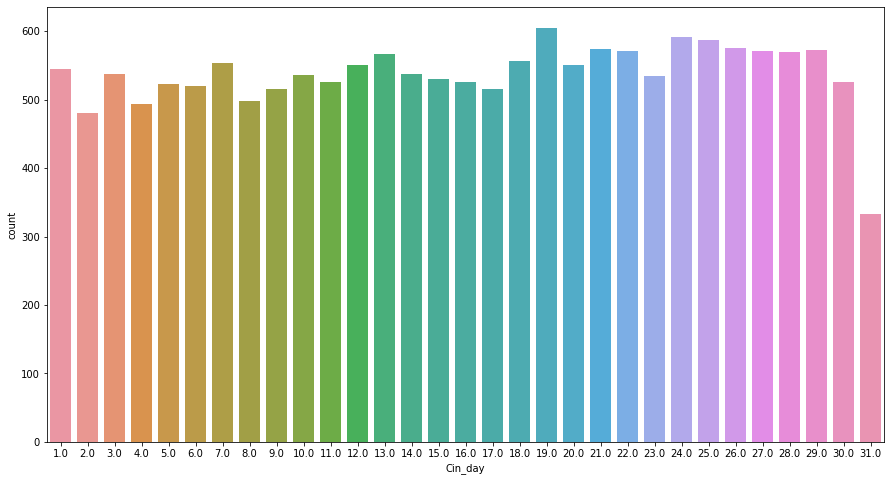

In [87]:
fig, ax= plt.subplots()
fig.set_size_inches(15,8)
sns.countplot('Cin_day',data=train[train['is_booking']==1])

According to the above graph we can deduce that on 1st day of any month customers are likely more to travel and book hotels. On 1st of each month customers get their salary and at that point they plan their trip
  

16. Total Booking over the Years

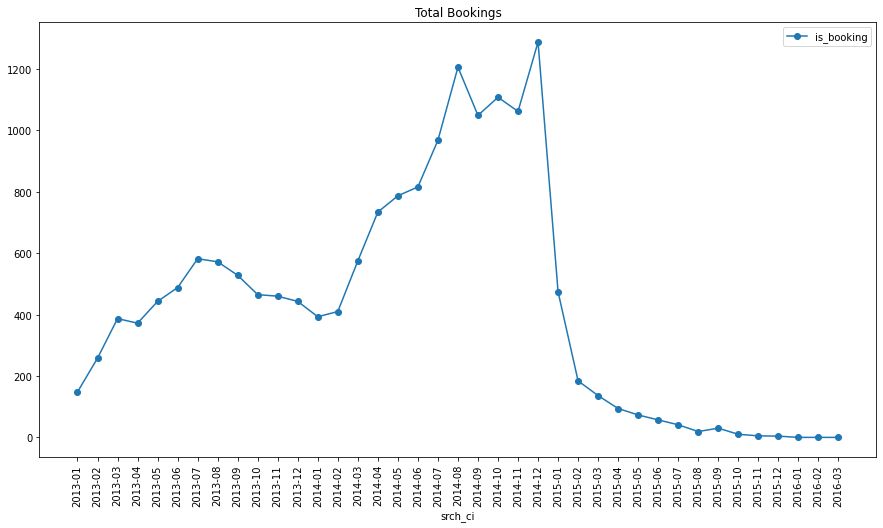

In [93]:
no_of_bookings = train['srch_ci'].apply(lambda x: (str(x)[:7]) if x == x else np.nan)
date_bookings = train.groupby(no_of_bookings)["is_booking"].sum()
ax1= date_bookings.plot(legend=True, marker='o', title="Total Bookings", figsize=(15,8))
ax1.set_xticks(range(len(date_bookings)))
xlabels= ax1.set_xticklabels(date_bookings.index.tolist(), rotation=90)

Above Graph shows the expedia Business over the years 2013, 2014, 2015 and 2016, its high points and its low point

17. Frequency of stay duration booked by customers

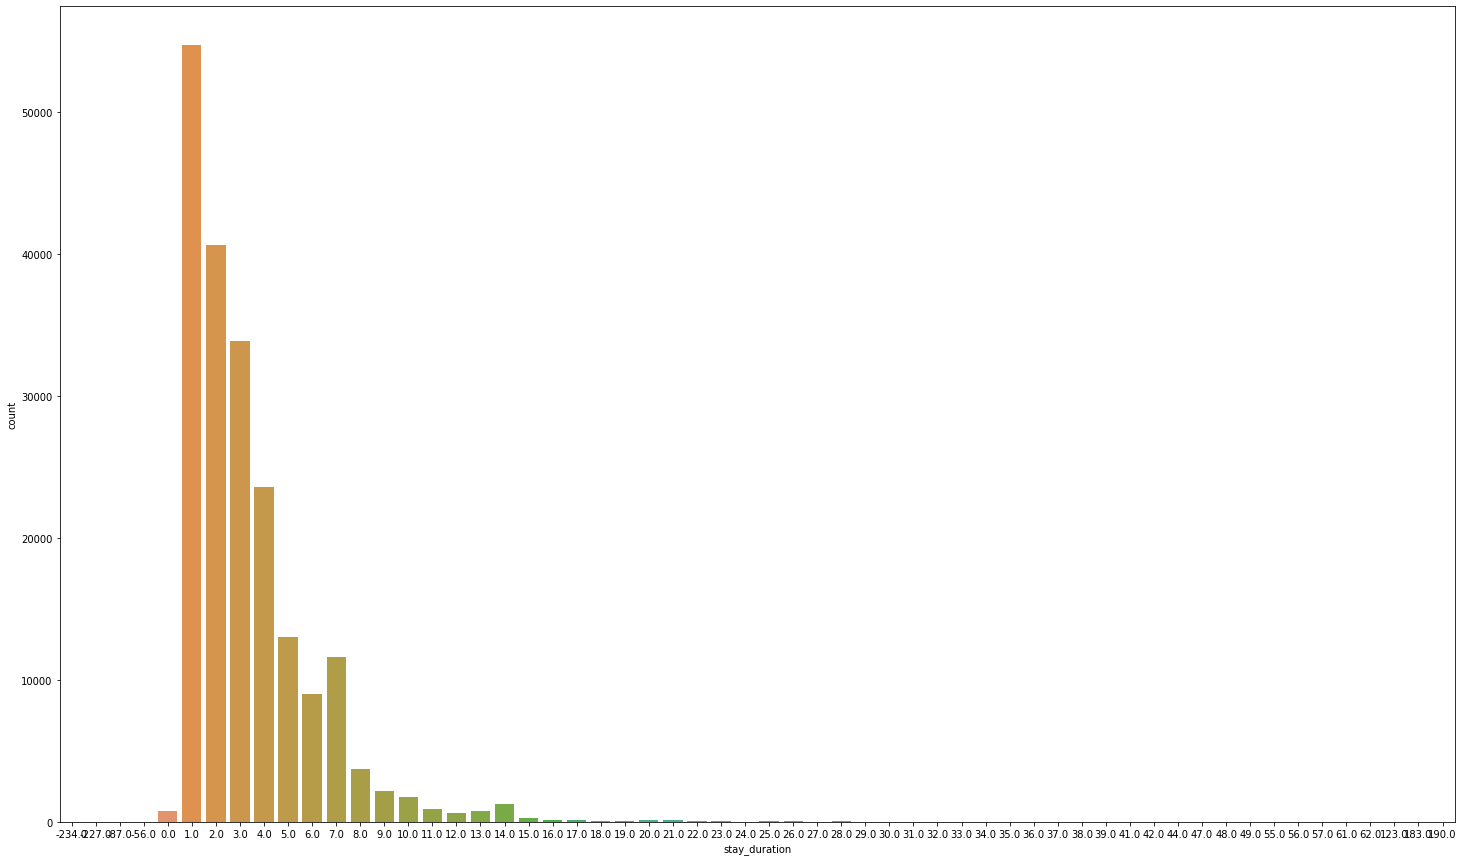

In [94]:
fig, ax = plt.subplots()
fig.set_size_inches(25,15)
sns.countplot(x="stay_duration", data=train)

In [95]:
train['stay_duration'].max()

190.0